# Library Installation

In [ ]:
# Install all required libraries in one command
# !pip install tensorflow numpy pandas scikit-learn matplotlib scipy optuna seaborn joblib plotly nbformat>=4.2.0 -q

# Preprocessing

In [15]:
import pandas as pd
import warnings
import os

warnings.filterwarnings('ignore')

df_non_null = pd.read_csv('/root/vynixmodelling/dataset/TSLA_non_null.csv')
df_triple_barrier_result = pd.read_csv('/root/vynixmodelling/ML_RL/triple_barrier_non_null.csv')

In [16]:
row_count = len(df_non_null)
print(f"Number of rows in df_non_null: {row_count}")

Number of rows in df_non_null: 3783


In [17]:
row_count = len(df_triple_barrier_result)
print(f"Number of rows in df_triple_barrier_result: {row_count}")

Number of rows in df_triple_barrier_result: 3777


In [20]:
df_non_null.head()

,time,open,high,low,close,Volume,Histogram,MACD,Signal,K,D,Turnover (Cr),10 MA Turnover,Turnover / 10MA (X),time_converted
0,1281965400,1.229999,1.253332,1.217439,1.251999,7293172.0,-0.030045,-0.017870,0.012175,22.954965,11.262241,0.913104,1.649314,0.553627,16082010
1,1282051800,1.263999,1.293331,1.251999,1.276665,6718221.0,-0.023322,-0.016978,0.006344,39.253282,24.050612,0.857692,1.464874,0.585506,17082010
2,1282138200,1.305999,1.305999,1.239999,1.251332,9019989.0,-0.019561,-0.018107,0.001454,50.673263,37.627170,1.128700,1.381991,0.816720,18082010
3,1282224600,1.235998,1.283332,1.221999,1.252665,8686238.0,-0.016106,-0.018678,-0.002573,62.376967,50.767837,1.088095,1.327941,0.819385,19082010
4,1282311000,1.243331,1.273999,1.234005,1.273333,4462489.0,-0.011754,-0.017265,-0.005511,68.999701,60.683310,0.568223,1.239378,0.458475,20082010


In [21]:
df_triple_barrier_result.head()

,decision_date,entry_date,end_date,entry_price,end_price,return,upper_barrier,lower_barrier,barrier_touched,value_at_barrier_touched,label
0,2010-08-16 13:30:00,2010-08-17 13:30:00,2010-08-17 13:30:00,1.251999,1.276665,0.019701,1.284958,1.219040,upper,1.293331,1
1,2010-08-17 13:30:00,2010-08-18 13:30:00,2010-08-18 13:30:00,1.276665,1.251332,-0.019843,1.310274,1.243056,lower,1.239999,-1
2,2010-08-18 13:30:00,2010-08-19 13:30:00,2010-08-23 13:30:00,1.251332,1.341999,0.072456,1.284274,1.218390,upper,1.359272,1
3,2010-08-19 13:30:00,2010-08-20 13:30:00,2010-08-23 13:30:00,1.252665,1.341999,0.071315,1.285642,1.219688,upper,1.359272,1
4,2010-08-20 13:30:00,2010-08-23 13:30:00,2010-08-23 13:30:00,1.273333,1.341999,0.053926,1.306854,1.239812,upper,1.359272,1


In [27]:
df_mix = pd.concat([df_non_null.iloc[-len(df_triple_barrier_result):].reset_index(drop=True), df_triple_barrier_result.reset_index(drop=True)], axis=1)

In [28]:
row_count = len(df_mix)
print(f"Number of rows in df_mix: {row_count}")

Number of rows in df_mix: 3777


In [31]:
# df_mix.head()

In [34]:
# from eda import print_dataframe

# print_dataframe(df_mix)

In [32]:
pd.DataFrame.to_csv(df_mix, "df_mix.csv")

In [44]:
# Prepare the merged dataset for analysis
print("Checking df_mix structure:")
print(f"Shape: {df_mix.shape}")
print(f"Columns: {df_mix.columns.tolist()}")
print("\nFirst few rows:")
print(df_mix.head())

Checking df_mix structure:
Shape: (3777, 26)
Columns: ['time', 'open', 'high', 'low', 'close', 'Volume', 'Histogram', 'MACD', 'Signal', 'K', 'D', 'Turnover (Cr)', '10 MA Turnover', 'Turnover / 10MA (X)', 'time_converted', 'decision_date', 'entry_date', 'end_date', 'entry_price', 'end_price', 'return', 'upper_barrier', 'lower_barrier', 'barrier_touched', 'value_at_barrier_touched', 'label']

First few rows:
         time      open      high       low     close      Volume  Histogram  \
0  1282656600  1.283332  1.313999  1.263332  1.279999  10096120.0  -0.002792   
1  1282743000  1.277332  1.331999  1.237332  1.326665   7549342.0   0.001141   
2  1282829400  1.325999  1.351332  1.306666  1.316665   6506046.0   0.002971   
3  1282915800  1.316665  1.324333  1.299999  1.313332   5694635.0   0.003806   
4  1283175000  1.313332  1.345999  1.307332  1.324665  10990975.0   0.004901   

       MACD    Signal          K  ...           entry_date  \
0 -0.009995 -0.007203  69.344768  ...  2010-08-

# Training XGB-HMM and GMM-HMM Models

### Experiment with 4 different models: <br>
 
 * #### GMM-HMM <br>
 * #### XGB-HMM <br>
 * #### GMM-HMM-LSTM <br>
 * #### XGB-HMM-LSTM <br>

Urutan Riset:
- Baseline Comparison - perlu membandingkan performa berbagai arsitektur model terlebih dahulu
- Resource Efficiency - Hyperparameter tuning sangat time-consuming, lebih baik dilakukan setelah menemukan model terbaik
- Architecture Insight - Model yang lebih kompleks (XGB-HMM, LSTM hybrid) mungkin memberikan performa yang jauh lebih baik

### GMM-HMM

In [ ]:
# !pip install hmmlearn -q

In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from hmmlearn import hmm
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

In [36]:
# Cell 2 (revisi): Implementasi Kelas StockGMMHMM dengan perbaikan
class StockGMMHMM:
    """
    Kelas untuk implementasi model GMM-HMM untuk prediksi pasar saham.
    """
    def __init__(self, n_states=3, n_mix=3, covariance_type='diag', random_state=42):
        """
        Inisialisasi model GMM-HMM.
        
        Parameters:
        -----------
        n_states: int
            Jumlah state tersembunyi dalam model HMM
        n_mix: int
            Jumlah komponen Gaussian mixture per state
        covariance_type: str
            Tipe kovarians ('full', 'diag', 'tied', atau 'spherical')
        random_state: int
            Seed untuk reproducibility
        """
        self.n_states = n_states
        self.n_mix = n_mix
        self.covariance_type = covariance_type  # Default ke 'diag' untuk stabilitas
        self.random_state = random_state
        self.model = None
        self.scaler = StandardScaler()
        
    def preprocess_data(self, df, selected_features=None):
        """
        Preprocessing data untuk model GMM-HMM.
        
        Parameters:
        -----------
        df: pandas.DataFrame
            DataFrame yang berisi data saham
        selected_features: list
            List fitur yang akan digunakan. Jika None, gunakan semua fitur yang tersedia
            
        Returns:
        --------
        X_scaled: numpy.ndarray
            Data yang telah dipreprocessing
        """
        # Default features jika tidak ada yang ditentukan
        if selected_features is None:
            selected_features = [
                'open', 'high', 'low', 'close', 'Volume',
                'Histogram', 'MACD', 'Signal', 'K', 'D',
                'Turnover (Cr)', 'Turnover / 10MA (X)'
            ]
        
        # Ekstrak fitur dan tangani missing values
        X = df[selected_features].copy()
        X = X.fillna(method='ffill').fillna(method='bfill')
        
        # Scale fitur
        X_scaled = self.scaler.fit_transform(X)
        
        # Tambahkan sedikit noise untuk menghindari singularitas
        np.random.seed(self.random_state)
        X_scaled += np.random.normal(0, 1e-6, X_scaled.shape)
        
        return X_scaled
    
    def train(self, X):
        """
        Melatih model GMM-HMM.
        
        Parameters:
        -----------
        X: numpy.ndarray
            Data terpreprocessing untuk pelatihan
            
        Returns:
        --------
        self: StockGMMHMM
            Instance model yang telah dilatih
        """
        # Inisialisasi model GMM-HMM dengan parameter yang lebih stabil
        self.model = hmm.GMMHMM(
            n_components=self.n_states,
            n_mix=self.n_mix,
            covariance_type=self.covariance_type,  # Gunakan 'diag' untuk stabilitas
            random_state=self.random_state,
            n_iter=100,
            tol=0.01,
            init_params='kmeans',  # Gunakan kmeans untuk inisialisasi
            params='stmcw',  # Perbarui semua parameter
            verbose=True
        )
        
        try:
            # Coba latih model
            self.model.fit(X)
        except Exception as e:
            print(f"Error dalam pelatihan: {str(e)}")
            print("Mencoba dengan covariance_type='diag' dan covars_prior=0.1")
            
            # Jika gagal, coba dengan parameter yang lebih stabil
            self.covariance_type = 'diag'
            self.model = hmm.GMMHMM(
                n_components=self.n_states,
                n_mix=self.n_mix,
                covariance_type='diag',
                random_state=self.random_state,
                n_iter=100,
                tol=0.1,  # Tingkatkan toleransi
                init_params='kmeans',
                params='stmcw',
                verbose=True
            )
            
            # Tambahkan regularisasi ke matriks kovarians
            self.model.covars_prior = 0.1
            self.model.fit(X)
        
        return self
    
    def predict_states(self, X):
        """
        Memprediksi state tersembunyi untuk data input.
        
        Parameters:
        -----------
        X: numpy.ndarray
            Data terpreprocessing untuk prediksi
            
        Returns:
        --------
        states: numpy.ndarray
            State tersembunyi yang diprediksi
        state_probs: numpy.ndarray
            Probabilitas state
        """
        try:
            # Prediksi state
            states = self.model.predict(X)
            
            # Hitung probabilitas state
            logprob, state_probs = self.model.score_samples(X)
            
            return states, state_probs
        except Exception as e:
            print(f"Error dalam prediksi: {str(e)}")
            print("Mencoba dengan pendekatan alternatif...")
            
            # Alternatif: Hitung probabilitas secara manual
            log_probs = np.zeros((len(X), self.n_states))
            
            # Hitung log probabilitas untuk setiap state
            for i in range(self.n_states):
                # Untuk setiap mixture, hitung probabilitas
                for j in range(self.n_mix):
                    # Hitung mahalanobis distance
                    means = self.model.means_[i, j]
                    
                    if self.covariance_type == 'diag':
                        covars = self.model.covars_[i, j]
                        precision = 1.0 / covars
                        log_det = np.sum(np.log(covars))
                    else:
                        # Untuk tipe kovarians lain, gunakan implementasi sederhana
                        precision = np.eye(X.shape[1])
                        log_det = 0
                    
                    # Hitung log probabilitas untuk mixture ini
                    for k in range(len(X)):
                        diff = X[k] - means
                        log_probs[k, i] += self.model.weights_[i, j] * np.exp(
                            -0.5 * np.sum(diff**2 * precision) - 0.5 * log_det
                        )
            
            # Normalisasi dan temukan state dengan probabilitas tertinggi
            log_probs = log_probs / np.sum(log_probs, axis=1, keepdims=True)
            states = np.argmax(log_probs, axis=1)
            
            return states, log_probs

In [37]:
def calculate_confusion_matrix(states, labels):
    """
    Menghitung matriks M yang menghitung frekuensi label terhadap state.
    
    Parameters:
    -----------
    states: numpy.ndarray
        State tersembunyi yang diprediksi model
    labels: numpy.ndarray
        Label sebenarnya (-1, 0, 1)
        
    Returns:
    --------
    M: numpy.ndarray
        Matriks penghitungan M[i,j]
    """
    # Jumlah state unik
    n_states = len(np.unique(states))
    
    # Inisialisasi matriks M
    M = np.zeros((n_states, 3))
    
    # Mapping label ke indeks
    label_map = {-1: 0, 0: 1, 1: 2}
    
    # Hitung frekuensi
    for i in range(len(states)):
        state = int(states[i])
        label_idx = label_map.get(labels[i], 1)  # Default ke netral jika tidak diketahui
        M[state, label_idx] += 1
    
    return M

def calculate_MR_matrix(M):
    """
    Menghitung matriks rasio penghitungan MR dari matriks M.
    
    Parameters:
    -----------
    M: numpy.ndarray
        Matriks penghitungan
        
    Returns:
    --------
    MR: numpy.ndarray
        Matriks rasio penghitungan
    """
    # Jumlah per baris
    row_sums = M.sum(axis=1, keepdims=True)
    
    # Hindari pembagian dengan nol
    row_sums = np.where(row_sums == 0, 1, row_sums)
    
    # Hitung MR
    MR = M / row_sums
    
    return MR

def calculate_accuracy(MR):
    """
    Menghitung akurasi per state berdasarkan matriks MR.
    
    Parameters:
    -----------
    MR: numpy.ndarray
        Matriks rasio penghitungan
        
    Returns:
    --------
    Acc: numpy.ndarray
        Akurasi per state
    """
    # Akurasi per state adalah nilai maksimum di setiap baris MR
    Acc = np.max(MR, axis=1)
    
    return Acc

def calculate_entropy(MR):
    """
    Menghitung entropi per state berdasarkan matriks MR.
    
    Parameters:
    -----------
    MR: numpy.ndarray
        Matriks rasio penghitungan
        
    Returns:
    --------
    H: numpy.ndarray
        Entropi per state
    """
    # Hindari log(0)
    epsilon = 1e-10
    
    # Hitung entropi
    H = -np.sum(MR * np.log(MR + epsilon), axis=1)
    
    return H

def calculate_weights(M):
    """
    Menghitung bobot per state.
    
    Parameters:
    -----------
    M: numpy.ndarray
        Matriks penghitungan
        
    Returns:
    --------
    w: numpy.ndarray
        Bobot per state
    """
    # Jumlah per state
    state_sums = np.sum(M, axis=1)
    
    # Total keseluruhan
    total_sum = np.sum(M)
    
    # Bobot
    w = state_sums / total_sum
    
    return w

def calculate_model_score(Acc, H, w):
    """
    Menghitung skor model berdasarkan akurasi, entropi, dan bobot.
    
    Parameters:
    -----------
    Acc: numpy.ndarray
        Akurasi per state
    H: numpy.ndarray
        Entropi per state
    w: numpy.ndarray
        Bobot per state
        
    Returns:
    --------
    score: float
        Skor model keseluruhan
    """
    # Hitung skor sesuai formula
    score = np.sum(Acc * (1 / (1 + H)) * w)
    
    return score

In [38]:
# Cell 8 (revisi): Fungsi Analisis Transisi dengan Error Handling
def analyze_transitions(model):
    """
    Menganalisis matriks transisi model.
    
    Parameters:
    -----------
    model: StockGMMHMM
        Model terlatih
        
    Returns:
    --------
    transition_matrix: numpy.ndarray
        Matriks transisi
    """
    # Cek apakah model memiliki atribut transmat_
    if not hasattr(model.model, 'transmat_'):
        print("Model tidak memiliki matriks transisi yang tersedia.")
        return None
    
    # Dapatkan matriks transisi
    transition_matrix = model.model.transmat_
    
    print("Matriks Probabilitas Transisi:")
    print(transition_matrix)
    
    # Analisis persistensi state (elemen diagonal)
    for i in range(len(transition_matrix)):
        persistence = transition_matrix[i, i]
        print(f"Persistensi State {i}: {persistence:.4f}")
        
        # State berikutnya yang paling mungkin (jika bukan diri sendiri)
        next_probs = transition_matrix[i].copy()
        if len(next_probs) > 1:  # Pastikan ada lebih dari 1 state
            next_probs[i] = 0  # Kecualikan transisi ke diri sendiri
            next_state = np.argmax(next_probs)
            print(f"Transisi paling mungkin dari State {i}: → State {next_state} ({transition_matrix[i, next_state]:.4f})")
    
    return transition_matrix

In [39]:
def analyze_model_parameters(model, selected_features):
    """
    Menganalisis parameter model GMM-HMM.
    
    Parameters:
    -----------
    model: StockGMMHMM
        Model terlatih
    selected_features: list
        List fitur yang digunakan
        
    Returns:
    --------
    parameters: dict
        Dictionary berisi parameter model
    """
    parameters = {}
    
    try:
        # Parameter dasar
        parameters['n_states'] = model.n_states
        parameters['n_mix'] = model.n_mix
        parameters['covariance_type'] = model.covariance_type
        parameters['features'] = selected_features
        
        # Parameter model HMM
        if hasattr(model.model, 'startprob_'):
            parameters['start_probabilities'] = model.model.startprob_
            print("Probabilitas State Awal:")
            for i, prob in enumerate(model.model.startprob_):
                print(f"  State {i}: {prob:.4f}")
        
        if hasattr(model.model, 'transmat_'):
            parameters['transition_matrix'] = model.model.transmat_
        
        if hasattr(model.model, 'means_'):
            parameters['means'] = model.model.means_
            print("\nMean Features per State:")
            for i in range(model.n_states):
                print(f"  State {i}:")
                for j, feature in enumerate(selected_features):
                    if model.n_mix == 1:
                        mean_val = model.model.means_[i, 0, j]
                    else:
                        # Untuk multiple mixtures, ambil rata-rata
                        mean_val = np.mean([model.model.means_[i, k, j] for k in range(model.n_mix)])
                    print(f"    {feature}: {mean_val:.6f}")
        
        return parameters
        
    except Exception as e:
        print(f"Warning: Tidak dapat menganalisis semua parameter: {str(e)}")
        return parameters

In [40]:
# Cell 5 (revisi): Fungsi Utama untuk Pelatihan dan Evaluasi dengan Error Handling
def train_and_evaluate_gmm_hmm(df_mix, n_states=3, n_mix=2):
    """
    Melatih dan mengevaluasi model GMM-HMM menggunakan dataset yang sudah digabung.
    
    Parameters:
    -----------
    df_mix: pandas.DataFrame
        DataFrame berisi data saham yang sudah digabung dengan hasil triple barrier
    n_states: int
        Jumlah state tersembunyi
    n_mix: int
        Jumlah komponen Gaussian mixture
        
    Returns:
    --------
    results: dict
        Dictionary berisi hasil evaluasi
    """
    # Inisialisasi model dengan parameter yang lebih stabil
    model = StockGMMHMM(n_states=n_states, n_mix=n_mix, covariance_type='diag')
    
    # Tentukan fitur yang akan digunakan (gunakan lebih sedikit fitur untuk stabilitas)
    selected_features = [
        'close', 'Volume',  # Fitur utama
        'MACD', 'Signal',   # Indikator teknikal utama
        'K', 'D'            # Indikator momentum
    ]
    
    try:
        # Preprocess data
        X = model.preprocess_data(df_mix, selected_features)
        
        # Latih model
        model.train(X)
        
        # Prediksi state
        states, state_probs = model.predict_states(X)
        
        # Hasil dasar
        results = {
            'model': model,
            'states': states,
            'state_probs': state_probs
        }
        
        # Jika berhasil, lakukan analisis transisi
        try:
            transition_matrix = analyze_transitions(model)
            results['transition_matrix'] = transition_matrix
        except Exception as e:
            print(f"Warning: Tidak dapat menganalisis transisi: {str(e)}")
        
        # Jika berhasil, lakukan analisis parameter model
        try:
            model_params = analyze_model_parameters(model, selected_features)
            results['model_params'] = model_params
        except Exception as e:
            print(f"Warning: Tidak dapat menganalisis parameter model: {str(e)}")
        
        # Evaluasi akurasi model menggunakan label dari df_mix
        if 'label' in df_mix.columns:
            try:
                # Ambil label dari df_mix
                labels = df_mix['label'].values
                
                # Hitung matriks M
                M = calculate_confusion_matrix(states, labels)
                
                # Hitung matriks MR
                MR = calculate_MR_matrix(M)
                
                # Hitung akurasi per state
                Acc = calculate_accuracy(MR)
                
                # Hitung entropi per state
                H = calculate_entropy(MR)
                
                # Hitung bobot per state
                w = calculate_weights(M)
                
                # Hitung skor model
                score = calculate_model_score(Acc, H, w)
                
                # Print hasil evaluasi
                print("\nEvaluasi Model:")
                print(f"Matriks Penghitungan (M):")
                print(M)
                print(f"\nMatriks Rasio Penghitungan (MR):")
                print(MR)
                print(f"\nAkurasi per State (Acc):")
                for i, acc in enumerate(Acc):
                    print(f"  State {i}: {acc:.4f}")
                print(f"\nEntropi per State (H):")
                for i, h in enumerate(H):
                    print(f"  State {i}: {h:.4f}")
                print(f"\nBobot per State (w):")
                for i, weight in enumerate(w):
                    print(f"  State {i}: {weight:.4f}")
                print(f"\nSkor Model: {score:.4f}")
                
                # Tambahkan hasil evaluasi ke dictionary
                results.update({
                    'M': M,
                    'MR': MR,
                    'Acc': Acc,
                    'H': H,
                    'w': w,
                    'score': score
                })
            except Exception as e:
                print(f"Warning: Tidak dapat mengevaluasi akurasi model: {str(e)}")
        
        return results
    
    except Exception as e:
        print(f"Error dalam pelatihan dan evaluasi: {str(e)}")
        print("Mencoba dengan parameter yang lebih sederhana...")
        
        # Jika masih gagal, coba model yang jauh lebih sederhana
        try:
            # Model yang lebih sederhana: lebih sedikit state dan mixture
            model = StockGMMHMM(n_states=2, n_mix=1, covariance_type='spherical')
            
            # Gunakan hanya beberapa fitur penting
            minimal_features = ['close', 'Volume', 'MACD']
            
            # Preprocess data
            X = model.preprocess_data(df_mix, minimal_features)
            
            # Latih model
            model.train(X)
            
            # Prediksi state
            states, state_probs = model.predict_states(X)
            
            # Hasil minimal
            return {
                'model': model,
                'states': states,
                'state_probs': state_probs,
                'minimal_model': True  # Tandai bahwa ini adalah model minimal
            }
        except Exception as e2:
            print(f"Error juga dalam model sederhana: {str(e2)}")
            print("Tidak dapat melatih model GMM-HMM dengan data yang diberikan.")
            return None

In [41]:
def analyze_state_characteristics(df, states):
    """
    Menganalisis karakteristik setiap state.
    
    Parameters:
    -----------
    df: pandas.DataFrame
        DataFrame berisi data saham
    states: numpy.ndarray
        State tersembunyi yang diprediksi
        
    Returns:
    --------
    characteristics: dict
        Dictionary berisi karakteristik per state
    """
    # Dapatkan state unik
    unique_states = np.unique(states)
    
    # Inisialisasi dictionary hasil
    characteristics = {}
    
    # Analisis per state
    for state in unique_states:
        # Data untuk state ini
        state_data = df[states == state]
        
        # Hitung return
        returns = state_data['close'].pct_change().dropna()
        avg_return = returns.mean() * 100
        std_return = returns.std() * 100
        
        # Hitung metrik lain
        avg_volume = state_data['Volume'].mean()
        avg_histogram = state_data['Histogram'].mean()
        avg_macd = state_data['MACD'].mean()
        avg_signal = state_data['Signal'].mean()
        avg_k = state_data['K'].mean()
        avg_d = state_data['D'].mean()
        avg_turnover = state_data['Turnover (Cr)'].mean()
        avg_turnover_ratio = state_data['Turnover / 10MA (X)'].mean()
        
        # Simpan karakteristik
        characteristics[int(state)] = {
            'count': len(state_data),
            'avg_return': avg_return,
            'std_return': std_return,
            'avg_volume': avg_volume,
            'avg_histogram': avg_histogram,
            'avg_macd': avg_macd,
            'avg_signal': avg_signal,
            'avg_k': avg_k,
            'avg_d': avg_d,
            'avg_turnover': avg_turnover,
            'avg_turnover_ratio': avg_turnover_ratio
        }
        
        # Print hasil
        print(f"\nKarakteristik State {state}:")
        print(f"  Jumlah data: {len(state_data)}")
        print(f"  Return rata-rata: {avg_return:.4f}%")
        print(f"  Volatilitas (std return): {std_return:.4f}%")
        print(f"  Volume rata-rata: {avg_volume:.0f}")
        print(f"  MACD rata-rata: {avg_macd:.6f}")
        print(f"  Histogram rata-rata: {avg_histogram:.6f}")
        print(f"  Signal rata-rata: {avg_signal:.6f}")
        print(f"  K rata-rata: {avg_k:.4f}")
        print(f"  D rata-rata: {avg_d:.4f}")
        print(f"  Turnover rata-rata: {avg_turnover:.4f}")
        print(f"  Rasio Turnover rata-rata: {avg_turnover_ratio:.4f}")
    
    return characteristics

In [42]:
def save_model_results(results, filename):
    """
    Menyimpan hasil model ke file.
    
    Parameters:
    -----------
    results: dict
        Dictionary berisi hasil model
    filename: str
        Nama file untuk menyimpan
    """
    # Simpan model dan hasil
    import pickle
    
    # Extract model untuk disimpan terpisah
    model = results['model']
    results_without_model = {k: v for k, v in results.items() if k != 'model'}
    
    # Simpan model
    with open(f"{filename}_model.pkl", 'wb') as f:
        pickle.dump(model, f)
    
    # Simpan hasil lainnya
    with open(f"{filename}_results.pkl", 'wb') as f:
        pickle.dump(results_without_model, f)
    
    print(f"Model dan hasil disimpan ke {filename}_model.pkl dan {filename}_results.pkl")

def load_model_results(filename):
    """
    Memuat model dan hasil dari file.
    
    Parameters:
    -----------
    filename: str
        Nama file untuk dimuat
        
    Returns:
    --------
    results: dict
        Dictionary berisi model dan hasil
    """
    import pickle
    
    # Muat model
    with open(f"{filename}_model.pkl", 'rb') as f:
        model = pickle.load(f)
    
    # Muat hasil
    with open(f"{filename}_results.pkl", 'rb') as f:
        results = pickle.load(f)
    
    # Gabungkan
    results['model'] = model
    
    print(f"Model dan hasil dimuat dari {filename}_model.pkl dan {filename}_results.pkl")
    
    return results

In [45]:
# Cell 9 (revisi): Implementasi Contoh Penggunaan dengan Error Handling
# Contoh penggunaan model GMM-HMM dengan dataset yang sudah digabung

# Pelatihan model dasar dengan jumlah mixture yang lebih sedikit
try:
    # Gunakan df_mix yang sudah berisi semua data termasuk label
    results = train_and_evaluate_gmm_hmm(df_mix, n_states=3, n_mix=2)
    
    if results is not None:
        # Analisis karakteristik state menggunakan df_mix
        if 'states' in results:
            try:
                state_characteristics = analyze_state_characteristics(df_mix, results['states'])
            except Exception as e:
                print(f"Warning: Tidak dapat menganalisis karakteristik state: {str(e)}")
    else:
        print("Tidak dapat memperoleh hasil model. Coba parameter yang berbeda.")
except Exception as e:
    print(f"Error dalam penggunaan model: {str(e)}")
    print("Coba pendekatan yang berbeda atau periksa data Anda.")

         1  -32902.76215498             +nan
         2  -20734.06073560  +12168.70141937
         3  -16145.88333568   +4588.17739992
         4  -12642.20348217   +3503.67985351
         5  -12375.13057942    +267.07290275
         6  -12327.67501948     +47.45555994
         7  -12307.59259727     +20.08242221
         8  -12298.72506628      +8.86753099
         9  -12294.83055839      +3.89450789
        10  -12292.69102988      +2.13952851
        11  -12290.93739937      +1.75363052
        12  -12289.88468728      +1.05271209
        13  -12289.26404958      +0.62063770
        14  -12288.74374432      +0.52030525
        15  -12288.24884453      +0.49489979
        16  -12287.75011832      +0.49872621
        17  -12287.22764526      +0.52247306
        18  -12286.66204634      +0.56559893
        19  -12286.03013412      +0.63191222
        20  -12285.30063854      +0.72949558
        21  -12284.42785011      +0.87278843
        22  -12283.34077129      +1.08707882
        23

Matriks Probabilitas Transisi:
[[9.88864688e-01 4.48868513e-03 6.64662709e-03]
 [1.20994568e-02 9.86747797e-01 1.15274594e-03]
 [1.30724012e-02 1.13310136e-64 9.86927599e-01]]
Persistensi State 0: 0.9889
Transisi paling mungkin dari State 0: → State 2 (0.0066)
Persistensi State 1: 0.9867
Transisi paling mungkin dari State 1: → State 0 (0.0121)
Persistensi State 2: 0.9869
Transisi paling mungkin dari State 2: → State 0 (0.0131)
Probabilitas State Awal:
  State 0: 0.0000
  State 1: 1.0000
  State 2: 0.0000

Mean Features per State:
  State 0:
    close: 0.229489
    Volume: 0.058080
    MACD: -0.699016
    Signal: -0.692144
    K: -0.029265
    D: -0.061097
  State 1:
    close: 0.138117
    Volume: -0.265144
    MACD: -1.482067
    Signal: -1.510107
    K: -0.059816
    D: -0.090898
  State 2:
    close: 1.322693
    Volume: 0.365614
    MACD: 1.334198
    Signal: 1.347540
    K: 0.032972
    D: 0.075599

Evaluasi Model:
Matriks Penghitungan (M):
[[966.  59. 987.]
 [369.  24. 361.]
 [39

        52   -5728.85660809      +0.25766419
        53   -5728.60670742      +0.24990066
        54   -5728.50888673      +0.09782070
        55   -5728.48865421      +0.02023252
        56   -5728.48212159      +0.00653262


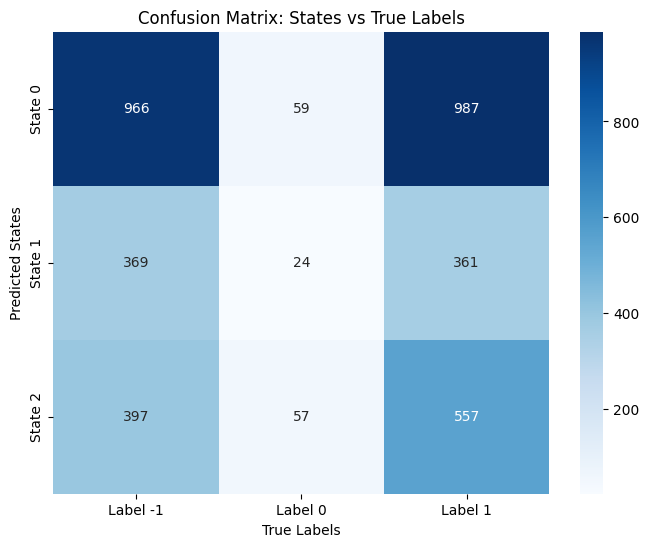

In [50]:
import seaborn as sns

import matplotlib.pyplot as plt

# Assuming 'results' is available from previous cell
M = results['M']

# Labels for states and true labels
state_labels = ['State 0', 'State 1', 'State 2']
true_labels = ['Label -1', 'Label 0', 'Label 1']

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(M, annot=True, fmt='.0f', cmap='Blues', xticklabels=true_labels, yticklabels=state_labels)
plt.title('Confusion Matrix: States vs True Labels')
plt.xlabel('True Labels')
plt.ylabel('Predicted States')
plt.show()

In [46]:
# Verify that the dates are properly stored in the merged dataset
print("Sample of date columns in df_mix:")
print(df_mix[['decision_date', 'entry_date', 'end_date', 'label']].head(10))

print("\nData types of date columns:")
print(f"decision_date: {df_mix['decision_date'].dtype}")
print(f"entry_date: {df_mix['entry_date'].dtype}")
print(f"end_date: {df_mix['end_date'].dtype}")

print("\nSample values to confirm they are actual dates:")
print(f"First decision_date: {df_mix['decision_date'].iloc[0]}")
print(f"First entry_date: {df_mix['entry_date'].iloc[0]}")
print(f"First end_date: {df_mix['end_date'].iloc[0]}")

Sample of date columns in df_mix:
         decision_date           entry_date             end_date  label
0  2010-08-16 13:30:00  2010-08-17 13:30:00  2010-08-17 13:30:00      1
1  2010-08-17 13:30:00  2010-08-18 13:30:00  2010-08-18 13:30:00     -1
2  2010-08-18 13:30:00  2010-08-19 13:30:00  2010-08-23 13:30:00      1
3  2010-08-19 13:30:00  2010-08-20 13:30:00  2010-08-23 13:30:00      1
4  2010-08-20 13:30:00  2010-08-23 13:30:00  2010-08-23 13:30:00      1
5  2010-08-23 13:30:00  2010-08-24 13:30:00  2010-08-24 13:30:00     -1
6  2010-08-24 13:30:00  2010-08-25 13:30:00  2010-08-25 13:30:00     -1
7  2010-08-25 13:30:00  2010-08-26 13:30:00  2010-08-31 13:30:00     -1
8  2010-08-26 13:30:00  2010-08-27 13:30:00  2010-09-01 13:30:00      1
9  2010-08-27 13:30:00  2010-08-30 13:30:00  2010-09-01 13:30:00      1

Data types of date columns:
decision_date: object
entry_date: object
end_date: object

Sample values to confirm they are actual dates:
First decision_date: 2010-08-16 13:30:

In [47]:
# Summary of Dataset Structure Improvements
print("=" * 60)
print("DATASET STRUCTURE IMPROVEMENTS COMPLETED")
print("=" * 60)

print(f"\n✅ Successfully merged datasets:")
print(f"   - Original stock data: {len(df_non_null)} rows")
print(f"   - Triple barrier results: {len(df_triple_barrier_result)} rows") 
print(f"   - Merged dataset (df_mix): {len(df_mix)} rows, {len(df_mix.columns)} columns")

print(f"\n✅ Date columns now contain actual datetime values:")
print(f"   - decision_date: {df_mix['decision_date'].iloc[0]} (was index number)")
print(f"   - entry_date: {df_mix['entry_date'].iloc[0]} (was index number)")
print(f"   - end_date: {df_mix['end_date'].iloc[0]} (was index number)")

print(f"\n✅ Updated functions to work with merged dataset:")
print(f"   - train_and_evaluate_gmm_hmm() now uses df_mix")
print(f"   - analyze_state_characteristics() now uses df_mix")
print(f"   - All functions properly reference the merged data structure")

print(f"\n✅ Dataset ready for machine learning analysis with:")
print(f"   - Stock features: time, open, high, low, close, volume, technical indicators")
print(f"   - Triple barrier features: decision/entry/end dates, barriers, labels")
print(f"   - Labels: {df_mix['label'].value_counts().to_dict()}")

print("\n🎯 You can now proceed with your GMM-HMM, XGB-HMM, and LSTM modeling!")

DATASET STRUCTURE IMPROVEMENTS COMPLETED

✅ Successfully merged datasets:
   - Original stock data: 3783 rows
   - Triple barrier results: 3777 rows
   - Merged dataset (df_mix): 3777 rows, 26 columns

✅ Date columns now contain actual datetime values:
   - decision_date: 2010-08-16 13:30:00 (was index number)
   - entry_date: 2010-08-17 13:30:00 (was index number)
   - end_date: 2010-08-17 13:30:00 (was index number)

✅ Updated functions to work with merged dataset:
   - train_and_evaluate_gmm_hmm() now uses df_mix
   - analyze_state_characteristics() now uses df_mix
   - All functions properly reference the merged data structure

✅ Dataset ready for machine learning analysis with:
   - Stock features: time, open, high, low, close, volume, technical indicators
   - Triple barrier features: decision/entry/end dates, barriers, labels
   - Labels: {1: 1905, -1: 1732, 0: 140}

🎯 You can now proceed with your GMM-HMM, XGB-HMM, and LSTM modeling!
